In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [133]:
data = pd.read_csv(r'C:\Users\DELL\Downloads\datasets.csv')

In [134]:
data.head()

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [131]:
pd.read_csv(r'C:\Users\DELL\Downloads\datasets.csv').shape

(6080, 14)

In [132]:
data.shape

(6080, 14)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 14 columns):
Unnamed: 0        6080 non-null int64
city              6080 non-null int64
area              6080 non-null int64
rooms             6080 non-null int64
bathroom          6080 non-null int64
parking spaces    6080 non-null int64
floor             6080 non-null object
animal            6080 non-null object
furniture         6080 non-null object
hoa               6080 non-null object
rent amount       6080 non-null object
property tax      6080 non-null object
fire insurance    6080 non-null object
total             6080 non-null object
dtypes: int64(6), object(8)
memory usage: 665.1+ KB


In [58]:
data['parking spaces'].unique()

array([ 4,  1,  0,  5,  8,  2,  3,  6,  7, 12], dtype=int64)

In [135]:
data.isnull().sum()

Unnamed: 0        0
city              0
area              0
rooms             0
bathroom          0
parking spaces    0
floor             0
animal            0
furniture         0
hoa               0
rent amount       0
property tax      0
fire insurance    0
total             0
dtype: int64

In [141]:
missing_value = ["-"]
data = pd.read_csv(r'C:\Users\DELL\Downloads\datasets.csv', na_values=missing_value)

In [142]:
data.head()

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,NaN,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,1,0,64,2,1,1,10.0,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,2,1,443,5,5,4,3.0,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,3,1,73,2,2,1,12.0,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,4,1,19,1,1,0,NaN,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [143]:
data.isnull().sum()

Unnamed: 0           0
city                 0
area                 0
rooms                0
bathroom             0
parking spaces       0
floor             1555
animal               0
furniture            0
hoa                  0
rent amount          0
property tax         0
fire insurance       0
total                0
dtype: int64

In [144]:
data.isnull().any()

Unnamed: 0        False
city              False
area              False
rooms             False
bathroom          False
parking spaces    False
floor              True
animal            False
furniture         False
hoa               False
rent amount       False
property tax      False
fire insurance    False
total             False
dtype: bool

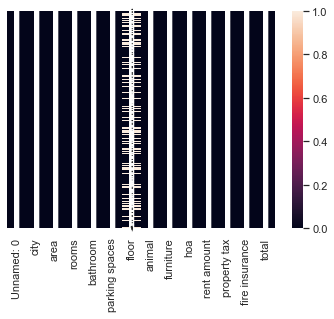

In [119]:
sns.heatmap(data.isnull(), yticklabels = False , annot=True)

In [145]:
new_data = data.replace('-' , value = np.NaN)
new_data.head()

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,NaN,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,1,0,64,2,1,1,10.0,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,2,1,443,5,5,4,3.0,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,3,1,73,2,2,1,12.0,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,4,1,19,1,1,0,NaN,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [147]:
new_data.isnull().sum()

Unnamed: 0           0
city                 0
area                 0
rooms                0
bathroom             0
parking spaces       0
floor             1555
animal               0
furniture            0
hoa                  0
rent amount          0
property tax         0
fire insurance       0
total                0
dtype: int64

In [150]:
new_data = data.replace({'hoa' : '[A-Z a-z $]', 'rent amount' :'[A-Z a-z $]' , 'property tax' : '[A-Z a-z $]' , 
                         'fire insurance': '[A-Z a-z $]', 'total': '[A-Z a-z $]'} , '' , regex = True)
new_data.head()

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,NaN,acept,furnished,0,"8,000","1,000",121,"9,121"
1,1,0,64,2,1,1,10.0,acept,not furnished,540,820,122,11,"1,493"
2,2,1,443,5,5,4,3.0,acept,furnished,"4,172","7,000","1,417",89,"12,680"
3,3,1,73,2,2,1,12.0,acept,not furnished,700,"1,250",150,16,"2,116"
4,4,1,19,1,1,0,NaN,not acept,not furnished,0,"1,200",41,16,"1,257"


In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 14 columns):
Unnamed: 0        6080 non-null int64
city              6080 non-null int64
area              6080 non-null int64
rooms             6080 non-null int64
bathroom          6080 non-null int64
parking spaces    6080 non-null int64
floor             4525 non-null float64
animal            6080 non-null object
furniture         6080 non-null object
hoa               6080 non-null object
rent amount       6080 non-null object
property tax      6080 non-null object
fire insurance    6080 non-null object
total             6080 non-null object
dtypes: float64(1), int64(6), object(7)
memory usage: 665.1+ KB


In [151]:
new_data.describe()

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor
count,6080.00000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,4525.000000
mean,3039.50000,0.863322,151.143914,2.492599,2.341612,1.756250,7.621436
std,1755.28915,0.343535,375.559485,1.129665,1.438860,1.611909,6.023028
min,0.00000,0.000000,10.000000,1.000000,1.000000,0.000000,1.000000
25%,1519.75000,1.000000,58.000000,2.000000,1.000000,1.000000,3.000000
50%,3039.50000,1.000000,100.000000,3.000000,2.000000,1.000000,6.000000
75%,4559.25000,1.000000,200.000000,3.000000,3.000000,2.000000,11.000000
max,6079.00000,1.000000,24606.000000,10.000000,10.000000,12.000000,99.000000
